In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import math
import random

from pylab import *

In [84]:
df = pd.read_csv("adult_preprocessed.csv",nrows=3000) # read file.csv 

In [85]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import gridspec
from sklearn import preprocessing

#without normolization, the pearson coefficient will be very large.
df_scaled = preprocessing.scale(df) #z-score
df=pd.DataFrame(df_scaled)  #array transfer into dataframe

df=df.drop( [0],axis='columns')
df.columns=['age',
'fnlwgt',
'education-num',
'marital-status',
'relationship',
'race',
'sex',
'capital-gain',
'capital-loss',
'hours-per-week',
'country',
'salary',
'employment_type']

df['salary']=df['salary']>0
for salary in df.columns:
    if df['salary'].dtype==bool:
        df['salary']=df['salary'].astype('int')
        
x= df.drop(['salary'],axis=1)
y=df['salary']

In [110]:
def pearson_correlation(df):
    df_pc=df.T.corr()
    df_pc=df_pc.replace(1,0)
    df_pc=abs(df_pc)
    df_pc=df_pc[df_pc>0.8]

    df_pc_sum=df_pc.sum()/2
    df_corr=df_pc_sum.max()
    return df_corr

In [111]:
pearson_correlation(x)

77.72499931347073

In [208]:
# df_pc=x.T.corr()
# df_pc=df_pc.replace(1,0)
# df_pc=abs(df_pc)
# df_pc=df_pc[df_pc>0.8]
# df_pc[np.isnan(df_pc)]=0
# df_pc_dummy=df_pc.mask(df_pc>0,1)

# df_mean=x.T.mean()
# df_mean=df_mean[x.T.mean()<-0.8]
# df_index=df_mean.index.tolist()
# count_pc=[]
# for i in range(0,len(df_index)):
#     count_pc.append(df_pc_dummy.iloc[df_index[i]].sum())
#     tra_sen_count=max(count_pc)

In [227]:
# sensitivity of group different privacy
def group_sen_count_query(df,condition):
    
    df_pc=df.T.corr()
    df_pc=df_pc.replace(1,0)
    df_pc=abs(df_pc)
    df_pc=df_pc[df_pc>0.9]
    df_pc[np.isnan(df_pc)]=0
    df_pc_dummy=df_pc.mask(df_pc>0,1) #turn Pearson coefficient into 1
    
    df_mean=df.T.mean()
    df_mean=df_mean[df.T.mean()<condition]
    df_index=df_mean.index.tolist()
    count_pc=[]
    for i in range(0,len(df_index)):
        count_pc.append(df_pc_dummy.iloc[df_index[i]].sum())
        tra_sen_count=max(count_pc)

    return tra_sen_count

In [228]:
group_sen_count_query(x,-0.7)

7.0

In [154]:
#noisy answer of group DP

# j=1000
# epsilon=1
# def MAE(df,condition):
#     sen=group_sen_count_query(df,condition)
#     b=sen/epsilon
#     group_noise_array=[]
#     for i in range(0,j):
#         group_noise_array.append(Laplace_noise(1, 1, 0, b))
#     group_noise_array=[abs(number) for number in group_noise_array]
#     group_noise_MAE=sum(group_noise_array)/j
#     return group_noise_MAE


In [217]:
j=1000
#epsilon=1
group_noise_array=[]
def MAE(df,condition,epsilon):
    sen=group_sen_count_query(df,condition)
    scale=sen/epsilon
    loc=0
    group_noise_array= np.random.laplace(loc, scale, j)
    group_noise_array=[abs(number) for number in group_noise_array]
    group_noise_MAE=sum(group_noise_array)/j
    
    return group_noise_MAE

In [218]:
#Laplace_noise(1, 1, 0, 6)

In [229]:
MAE(x,-0.7,1)

6.663257593110743

In [231]:
import math
import random
MAE_array=[]
for i in range(1,10):
    epsilon=i/10
    
    MAE_array.append(MAE(x,-0.7,epsilon))
MAE_array   


[70.41842878919972,
 34.67978956192457,
 23.040935659258047,
 16.877826955316007,
 13.996604288292877,
 11.816983054726387,
 9.472405759014633,
 8.869353473320695,
 8.278048406347377]

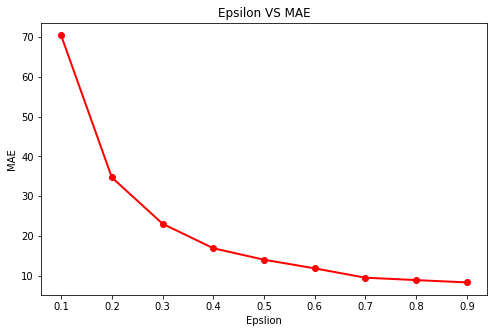

In [232]:

x_label=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9 ]
plt.figure(figsize=(8, 5))
plt.plot(x_label,MAE_array,linewidth=2.0,color='red',markerfacecolor='red',marker='o',label='proposed scheme')
plt.xlabel("Epslion")
plt.ylabel("MAE")
plt.title('Epsilon VS MAE')
#plt.grid(True)
#xlim(0.2, 1)
#ylim(0,1)
#plt.show()
plt.savefig("Epsilon VS MAE .jpg")

# proposed scheme

In [245]:
#sensitivity of proposed scheme
def sen_count_query(df,condition):
    
    df_pc=df.T.corr()
    df_pc=df_pc.replace(1,0)
    df_pc=abs(df_pc)
    df_pc=df_pc[df_pc>0.9]
    df_pc[np.isnan(df_pc)]=0
    
   
    df_mean=df.T.mean()
    df_mean=df_mean[df.T.mean()<condition]
    df_index=df_mean.index.tolist()
    count_pc=[]
    for i in range(0,len(df_index)):
        count_pc.append(df_pc.iloc[df_index[i]].sum())
        tra_sen_count=max(count_pc)

    return tra_sen_count

In [246]:
sen_count_query(x,-0.7)

6.421725673307343

In [247]:
j=1000
#epsilon=1
proposed_noise_array=[]
def MAE_proposed(df,condition,epsilon):
    sen=sen_count_query(df,condition)
    scale=sen/epsilon
    loc=0
    group_noise_array= np.random.laplace(loc, scale, j)
    group_noise_array=[abs(number) for number in group_noise_array]
    group_noise_MAE=sum(group_noise_array)/j
    
    return group_noise_MAE


In [248]:
import math
import random
MAE_proposed_array=[]
for i in range(1,10):
    epsilon=i/10
    
    MAE_proposed_array.append(MAE_proposed(x,-0.7,epsilon))
MAE_proposed_array 

[64.24766003261878,
 31.188158671835104,
 21.020893028800277,
 15.618449029301527,
 12.6579721131791,
 10.660946112032077,
 9.857337360428671,
 8.109198038315633,
 7.280223278695056]

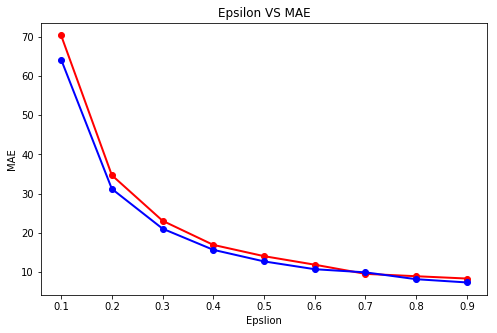

In [249]:
x_label=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9 ]
plt.figure(figsize=(8, 5))
plt.plot(x_label,MAE_array,linewidth=2.0,color='red',markerfacecolor='red',marker='o',label='group DP')
plt.plot(x_label,MAE_proposed_array,linewidth=2.0,color='blue',markerfacecolor='blue',marker='o',label='proposed scheme')
plt.xlabel("Epslion")
plt.ylabel("MAE")
plt.title('Epsilon VS MAE')
#plt.grid(True)
#xlim(0.2, 1)
#ylim(0,1)
#plt.show()
plt.savefig("Epsilon VS MAE .jpg")

# feature selection scheme